# Dataset: Generación de Energía Solar

### Descripción
Este conjunto de datos ofrece una visión completa de la generación de energía solar. Incluye datos históricos sobre radiación solar, condiciones climáticas y producción de energía de sistemas fotovoltaicos (PV). Los datos fueron recopilados de una planta solar operativa cerca de Hassan, Karnataka, India. Se utilizó un registrador de datos instalado y se prepararon los datos para alimentar un modelo de aprendizaje automático.

Fuente de datos:
[SolarGeneration](https://www.kaggle.com/datasets/arunkanagolkar/solargeneration)

### Contenido
* **Datos de Radiación Solar:** Mediciones de irradiancia horizontal global (GHI), irradiancia normal directa (DNI) e irradiancia horizontal difusa (DHI).
* **Parámetros Meteorológicos:** Temperatura, velocidad del viento (afecta la eficiencia de los paneles solares).
* **Producción del Sistema Fotovoltaico:** Potencia registrada de instalaciones fotovoltaicas de 350 kWp.

### Usos Potenciales
Este conjunto de datos es ideal para investigar energías renovables, especialmente para aplicar modelos de aprendizaje automático y profundo en:
* **Pronóstico de generación solar**
* **Análisis del impacto del clima en la producción solar**
* **Optimización de ubicación y operación de paneles solares**

## Integrantes:


*   Sarish Paola Pineda Hernandez
*   Eldigardo Camacho Cespedes



## Carga y Exploración del Conjunto de Datos:

* Mostrar cómo cargar el conjunto de datos en un DataFrame utilizando pandas.



In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Utilizamos la biblioteca pandas para leer el archivo en este caso en formato csv

In [11]:
df= pd.read_csv("Generation_data.csv")
df.head()

MODULE_TEMP  Amb_Temp  WIND_Speed  IRR (W/m2)  DC Current in Amps  \
0      18.7675  17.85190    47.60506    6.388252                0.60   
1      18.6150  18.59573    64.26684   12.776500                0.66   
2      18.9200  18.59573    85.68912   17.035340                4.74   
3      18.9200  18.59573    83.30886   25.553010                8.18   
4      19.0725  18.59573    57.12608   36.200090               26.66   

   AC Ir in Amps  AC Iy in Amps  AC Ib in Amps  AC Power in Watts  
0            8.6            8.6            8.7               3233  
1            9.6            9.7           10.0               4504  
2           11.9           12.0           12.4               6614  
3           14.8           14.7           14.7               8971  
4           18.6           18.4           18.5              12071

* Revisar la cantidad de columnas y filas para tener una idea general del tamaño del conjunto de datos.

In [12]:
num_filas,num_columnas = df.shape
print(f'Número de filas: {num_filas}\nNúmero de columnas: {num_columnas}')

Número de filas: 118865
Número de columnas: 9


por medio de metodo shape se visualiza el tamaño de las columna y las filas, se guarda dentro de una variable para que se visualice mas facilmente. Posteriomente usamos el metodo columns para saber que encabezados son relevante o no dentro de el estudio a realizar

In [13]:
df.columns

Index(['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)',
       'DC Current in Amps', 'AC Ir in Amps', 'AC Iy in Amps', 'AC Ib in Amps',
       'AC Power in Watts'],
      dtype='object')

## Tipos de Datos

* Identificar los tipos de datos de cada columna (numéricos, categóricos, booleanos, etc.).

In [14]:
df.dtypes

MODULE_TEMP           float64
Amb_Temp              float64
WIND_Speed            float64
IRR (W/m2)            float64
DC Current in Amps    float64
AC Ir in Amps         float64
AC Iy in Amps         float64
AC Ib in Amps         float64
AC Power in Watts       int64
dtype: object

* Discutir la importancia de los tipos de datos en el análisis y modelado.

Para poder trabajar con los datos de cada columna necesitamos saber que tipo de dato es, para eso usamos el metodo dtypes que nos ayuda a visualizar si los tipos son categoricos, numericos o punto flotante. Asi podremos hacer las conversiones de los tipos de datos necesarios de ser requeridos.

## Cantidad de Datos Faltantes:

* Detectar la cantidad de datos faltantes en cada columna.

Hacemos un conteo de los datos faltantes por cada columna

In [15]:
df.isnull().sum()

MODULE_TEMP           0
Amb_Temp              0
WIND_Speed            0
IRR (W/m2)            0
DC Current in Amps    0
AC Ir in Amps         0
AC Iy in Amps         0
AC Ib in Amps         0
AC Power in Watts     0
dtype: int64

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

MODULE_TEMP           0.0
Amb_Temp              0.0
WIND_Speed            0.0
IRR (W/m2)            0.0
DC Current in Amps    0.0
AC Ir in Amps         0.0
AC Iy in Amps         0.0
AC Ib in Amps         0.0
AC Power in Watts     0.0
dtype: float64


* Discutir sobre el impacto que tiene los datos faltantes en el problema en cuestión en fases más avanzadas del desarrollo del modelo de machine learning

Utilizando el metodo isnull. Se puede observar que en nuestro dataframe no hay presencia de datos faltantes, no se hace necesaria  la imputacion de datos nulos (rellenar o agregar datos a los null para que el dataframe este completo y sin vacios)

## Verificación de Reglas de Rango y Dominio:

* Identificar y marcar los datos basura, como valores erróneos o irrelevantes

In [17]:
df.columns

Index(['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)',
       'DC Current in Amps', 'AC Ir in Amps', 'AC Iy in Amps', 'AC Ib in Amps',
       'AC Power in Watts'],
      dtype='object')

Descripcion de cada una de las columnas:

* **MODULE_Temp**: Temperatura de la superficie del Modulo de Panel Solar

* **Amb_Temp**:Temperatura ambiente en grados Celsius

* **WIND_Speed** : Velocidad del viento

* **IRR (W/m2)** : Irradiancia es la potencia de la radiación solar por unidad de área, medida en W/m2.

* **DC Current in Amps** : Corriente Directa

* **AC Ir in Amps**  : Corriente Alterna de la Fase R

* **AC Iy in Amps** : Corriente Alterna de la Fase Y

* **AC Ib in Amps** :Corriente Alterna de la Fase B

* **AC Power in Watts** : Potencia de salida de Corriente Alterna en Watts

## Verificación de Reglas de Rango y Dominio:
* Identificar y marcar los datos basura, como valores erróneos o irrelevantes.

Revisamos si existen datos duplicados en las filas

In [18]:
df.duplicated().sum()

np.int64(0)

* Revisar valores fuera de un rango esperado o texto en columnas numéricas.

In [19]:
# Se asume un rango de temperatura razonable para la ubicación geográfica.
min_temp = -10  # Temperatura mínima plausible
max_temp = 50   # Temperatura máxima plausible

# Filtramos las temperaturas fuera de rango
out_of_range_temp = df[(df['Amb_Temp'] < min_temp) | (df['Amb_Temp'] > max_temp)]

print("Temperaturas fuera de rango:")
print(out_of_range_temp)

Temperaturas fuera de rango:
Empty DataFrame
Columns: [MODULE_TEMP, Amb_Temp, WIND_Speed, IRR (W/m2), DC Current in Amps, AC Ir in Amps, AC Iy in Amps, AC Ib in Amps, AC Power in Watts]
Index: []


No existe ningun valor de temperatura fuera del rango de normalidad de la zona

In [20]:
# Se busca por ejemplo valores no numericos en la columna 'WIND_Speed'
non_numeric_wind_speed = df[pd.to_numeric(df['WIND_Speed'], errors='coerce').isnull()]
print("\nValores no numéricos en WIND_Speed:")
print(non_numeric_wind_speed)


Valores no numéricos en WIND_Speed:
Empty DataFrame
Columns: [MODULE_TEMP, Amb_Temp, WIND_Speed, IRR (W/m2), DC Current in Amps, AC Ir in Amps, AC Iy in Amps, AC Ib in Amps, AC Power in Watts]
Index: []


No existe ningun valor no numerico en la columna WIND_Speed

Hacemos un describe del dataframe para tener una visualizacion general de todos los datos

In [21]:
df.describe()

MODULE_TEMP       Amb_Temp     WIND_Speed     IRR (W/m2)  \
count  118865.000000  118865.000000  118865.000000  118865.000000   
mean       37.141972      22.961983     224.429052     428.093276   
std        12.017936       3.921594     230.238430     313.280827   
min         8.855000      10.413610       0.238025       2.129417   
25%        26.697500      20.083390      28.325010     155.447500   
50%        36.457500      23.058700      59.030280     357.742100   
75%        46.675000      26.034020     442.727100     687.801800   
max        72.447500      34.959970     597.443500    1494.851000   

       DC Current in Amps  AC Ir in Amps  AC Iy in Amps  AC Ib in Amps  \
count       118865.000000  118865.000000  118865.000000  118865.000000   
mean           355.902071     172.329754     172.190557     172.351243   
std            264.863384     120.507508     120.448101     120.503308   
min              0.600000       1.400000       1.400000       1.500000   
25%            126.180000      65.600000      65.500000      65.600000   
50%            298.600000     150.000000     150.000000     150.100000   
75%            576.320000     277.700000     277.400000     277.600000   
max            995.679988     461.200000     461.100000     461.700000   

       AC Power in Watts  
count      118865.000000  
mean       128081.179666  
std         91193.677193  
min           394.000000  
25%         47737.000000  
50%        110673.000000  
75%        206594.000000  
max        332614.000000

* Discutir estrategias para limpiar los datos basura

Para nuestro caso en el dataframe no se encuentras datos redundantes, datos irrelevantes ni duplicados que se necesiten eliminar.

## Dimensiones de la Calidad de Datos:

* Evaluar la completitud, consistencia y exactitud de los datos

Revisamos si alguna columna tiene valores negativos

In [22]:
# Accuracy (Exactitud)
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
  # Example: Check for negative values in columns that shouldn't have them
  if col in ['Amb_Temp','WIND_Speed','IRR (W/m2)','DC Current in Amps', 'AC Ir in Amps',  'AC Iy in Amps','AC Ib in Amps', 'AC Power in Watts']:
      negative_values = df[df[col] < 0]
      if not negative_values.empty:
          print(f"\nNegative values found in column '{col}':")
          print(negative_values)


No existen datos numericos negativos

In [23]:
completitud = 100 - missing_percentage
print("Completitud:")
print(completitud)

Completitud:
MODULE_TEMP           100.0
Amb_Temp              100.0
WIND_Speed            100.0
IRR (W/m2)            100.0
DC Current in Amps    100.0
AC Ir in Amps         100.0
AC Iy in Amps         100.0
AC Ib in Amps         100.0
AC Power in Watts     100.0
dtype: float64


En este caso tenemos un 100% de completitud de los datos

## Detección y Tratamiento de Datos Ausentes

* Mostrar cómo manejar los datos faltantes mediante el descarte o técnicas de
imputación (media, mediana, regresión, Hot deck)

Para nuestro dataframe no se hace necesario este paso, ya que no tenemos datos faltantes.

## Normalización de Datos

* Aplicar técnicas de Min-Max Scaling y escalado robusto para normalizar los datos y mejorar el rendimiento del modelo.

In [24]:
# Seleccionar columnas numéricas para la normalización
numerical_cols = df.select_dtypes(include=['number']).columns

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()  # Crear una copia para no modificar el DataFrame original
df_minmax[numerical_cols] = scaler_minmax.fit_transform(df_minmax[numerical_cols])

# Escalado Robusto
scaler_robust = RobustScaler()
df_robust = df.copy() # Crear una copia para no modificar el DataFrame original
df_robust[numerical_cols] = scaler_robust.fit_transform(df_robust[numerical_cols])

In [25]:
# Mostrar los primeros registros de los DataFrames normalizados
print("\nDataFrame con Min-Max Scaling:")
print(df_minmax.head())


DataFrame con Min-Max Scaling:
   MODULE_TEMP  Amb_Temp  WIND_Speed  IRR (W/m2)  DC Current in Amps  \
0     0.155875  0.303030    0.079314    0.002853            0.000000   
1     0.153477  0.333333    0.107214    0.007133            0.000060   
2     0.158273  0.333333    0.143085    0.009986            0.004160   
3     0.158273  0.333333    0.139099    0.015692            0.007617   
4     0.160671  0.333333    0.095257    0.022825            0.026189   

   AC Ir in Amps  AC Iy in Amps  AC Ib in Amps  AC Power in Watts  
0       0.015659       0.015662       0.015645           0.008546  
1       0.017834       0.018055       0.018470           0.012371  
2       0.022836       0.023059       0.023685           0.018723  
3       0.029143       0.028932       0.028683           0.025817  
4       0.037408       0.036981       0.036940           0.035148  


In [26]:
print("\nDataFrame con Escalado Robusto:")
print(df_robust.head())


DataFrame con Escalado Robusto:
   MODULE_TEMP  Amb_Temp  WIND_Speed  IRR (W/m2)  DC Current in Amps  \
0    -0.885496    -0.875   -0.027570      -0.660           -0.662016   
1    -0.893130    -0.750    0.012636      -0.648           -0.661883   
2    -0.877863    -0.750    0.064331      -0.640           -0.652819   
3    -0.877863    -0.750    0.058587      -0.624           -0.645177   
4    -0.870229    -0.750   -0.004595      -0.604           -0.604123   

   AC Ir in Amps  AC Iy in Amps  AC Ib in Amps  AC Power in Watts  
0      -0.666667      -0.667296      -0.666981          -0.676332  
1      -0.661952      -0.662105      -0.660849          -0.668331  
2      -0.651108      -0.651251      -0.649528          -0.655048  
3      -0.637435      -0.638509      -0.638679          -0.640211  
4      -0.619519      -0.621048      -0.620755          -0.620697  


## Análisis Univariable

* Validar la distribución normal de las variables.
* Calcular estadísticas descriptivas como media, mediana, moda y desviación estándar.

In [27]:
# Funcion para Análisis Univariable de un dataframe

def analizar_univariable(df, nombre_df):
    """
    Realiza el análisis univariable de un DataFrame dado.

    Args:
        df: DataFrame a analizar.
        nombre_df: Nombre del DataFrame (para mostrar en los títulos).
    """
    print(f"## Análisis Univariable para {nombre_df}")

    for col in df.select_dtypes(include=['number']).columns:
        print(f"\n### Análisis de la variable '{col}'")

        # Validación de la distribución normal (test de Shapiro-Wilk)
        shapiro_test = stats.shapiro(df[col])
        print(f"Test de Shapiro-Wilk: {shapiro_test}")
        if shapiro_test.pvalue > 0.05:
          print("La distribución de los datos parece ser normal")
        else:
          print("La distribución de los datos no parece ser normal")


        # Estadísticas descriptivas
        print(f"\n**Estadísticas Descriptivas:**")
        print(df[col].describe())
        print(f"Moda: {df[col].mode()[0]}")  # Calcular la moda

        # # Histograma con curva de densidad
        # plt.figure(figsize=(8, 6))
        # sns.histplot(df[col], kde=True)
        # plt.title(f"Histograma de {col} ({nombre_df})")
        # plt.xlabel(col)
        # plt.ylabel("Frecuencia")
        # plt.show()

        # # Boxplot
        # plt.figure(figsize=(8, 6))
        # sns.boxplot(y=df[col])
        # plt.title(f"Boxplot de {col} ({nombre_df})")
        # plt.ylabel(col)
        # plt.show()

In [28]:
# Aplicar la función a ambos DataFrames
analizar_univariable(df_minmax, "df_minmax")

## Análisis Univariable para df_minmax

### Análisis de la variable 'MODULE_TEMP'
Test de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9689975657881646), pvalue=np.float64(1.169682460113421e-85))
La distribución de los datos no parece ser normal

**Estadísticas Descriptivas:**
count    118865.000000
mean          0.444816
std           0.188984
min           0.000000
25%           0.280576
50%           0.434053
75%           0.594724
max           1.000000
Name: MODULE_TEMP, dtype: float64
Moda: 0.21103117505995203

### Análisis de la variable 'Amb_Temp'
Test de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9785587393174681), pvalue=np.float64(4.6186081967405e-77))
La distribución de los datos no parece ser normal

**Estadísticas Descriptivas:**
count    118865.000000
mean          0.511211
std           0.159763
min           0.000000
25%           0.393939
50%           0.515151
75%           0.636364
max           1.000000
Name: Amb_Temp, dtype: float64
Moda: 0.515151329

In [29]:
# Aplicar la función a ambos DataFrames
analizar_univariable(df_robust, "df_robust")

## Análisis Univariable para df_robust

### Análisis de la variable 'MODULE_TEMP'
Test de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9689975657881646), pvalue=np.float64(1.169682460113421e-85))
La distribución de los datos no parece ser normal

**Estadísticas Descriptivas:**
count    118865.000000
mean          0.034262
std           0.601574
min          -1.381679
25%          -0.488550
50%           0.000000
75%           0.511450
max           1.801527
Name: MODULE_TEMP, dtype: float64
Moda: -0.7099236641221378

### Análisis de la variable 'Amb_Temp'
Test de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9785587393174681), pvalue=np.float64(4.6186081967405e-77))
La distribución de los datos no parece ser normal

**Estadísticas Descriptivas:**
count    118865.000000
mean         -0.016253
std           0.659022
min          -2.125000
25%          -0.499999
50%           0.000000
75%           0.500001
max           2.000002
Name: Amb_Temp, dtype: float64
Moda: 0.0

### An

In [30]:
# Funcion para Análisis Univariable de un dataframe en forma de tabla
def analizar_univariable_tabla(df, nombre_df):
    """
    Realiza el análisis univariable de un DataFrame dado y muestra los gráficos en una tabla.

    Args:
        df: DataFrame a analizar.
        nombre_df: Nombre del DataFrame (para mostrar en los títulos).
    """
    print(f"## Análisis Univariable para {nombre_df}")

    num_cols = len(df.select_dtypes(include=['number']).columns)
    # Calculamos el número de filas necesarias
    num_rows = (num_cols - 1) // 5 + 1

    # Creamos la figura con el número correcto de filas y columnas
    fig, axes = plt.subplots(nrows=2 * num_rows, ncols=5, figsize=(20, 16))

    # Iterar sobre las columnas numéricas y crear los subplots
    for i, col in enumerate(df.select_dtypes(include=['number']).columns):
        row_idx = 2 * (i // 5)
        col_idx = i % 5

        # Histograma
        sns.histplot(df[col], kde=True, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Histograma de {col}")
        axes[row_idx, col_idx].set_xlabel(col)
        axes[row_idx, col_idx].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[row_idx + 1, col_idx])
        axes[row_idx + 1, col_idx].set_title(f"Boxplot de {col}")
        axes[row_idx + 1, col_idx].set_ylabel(col)

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()

## Análisis Univariable para df_minmax


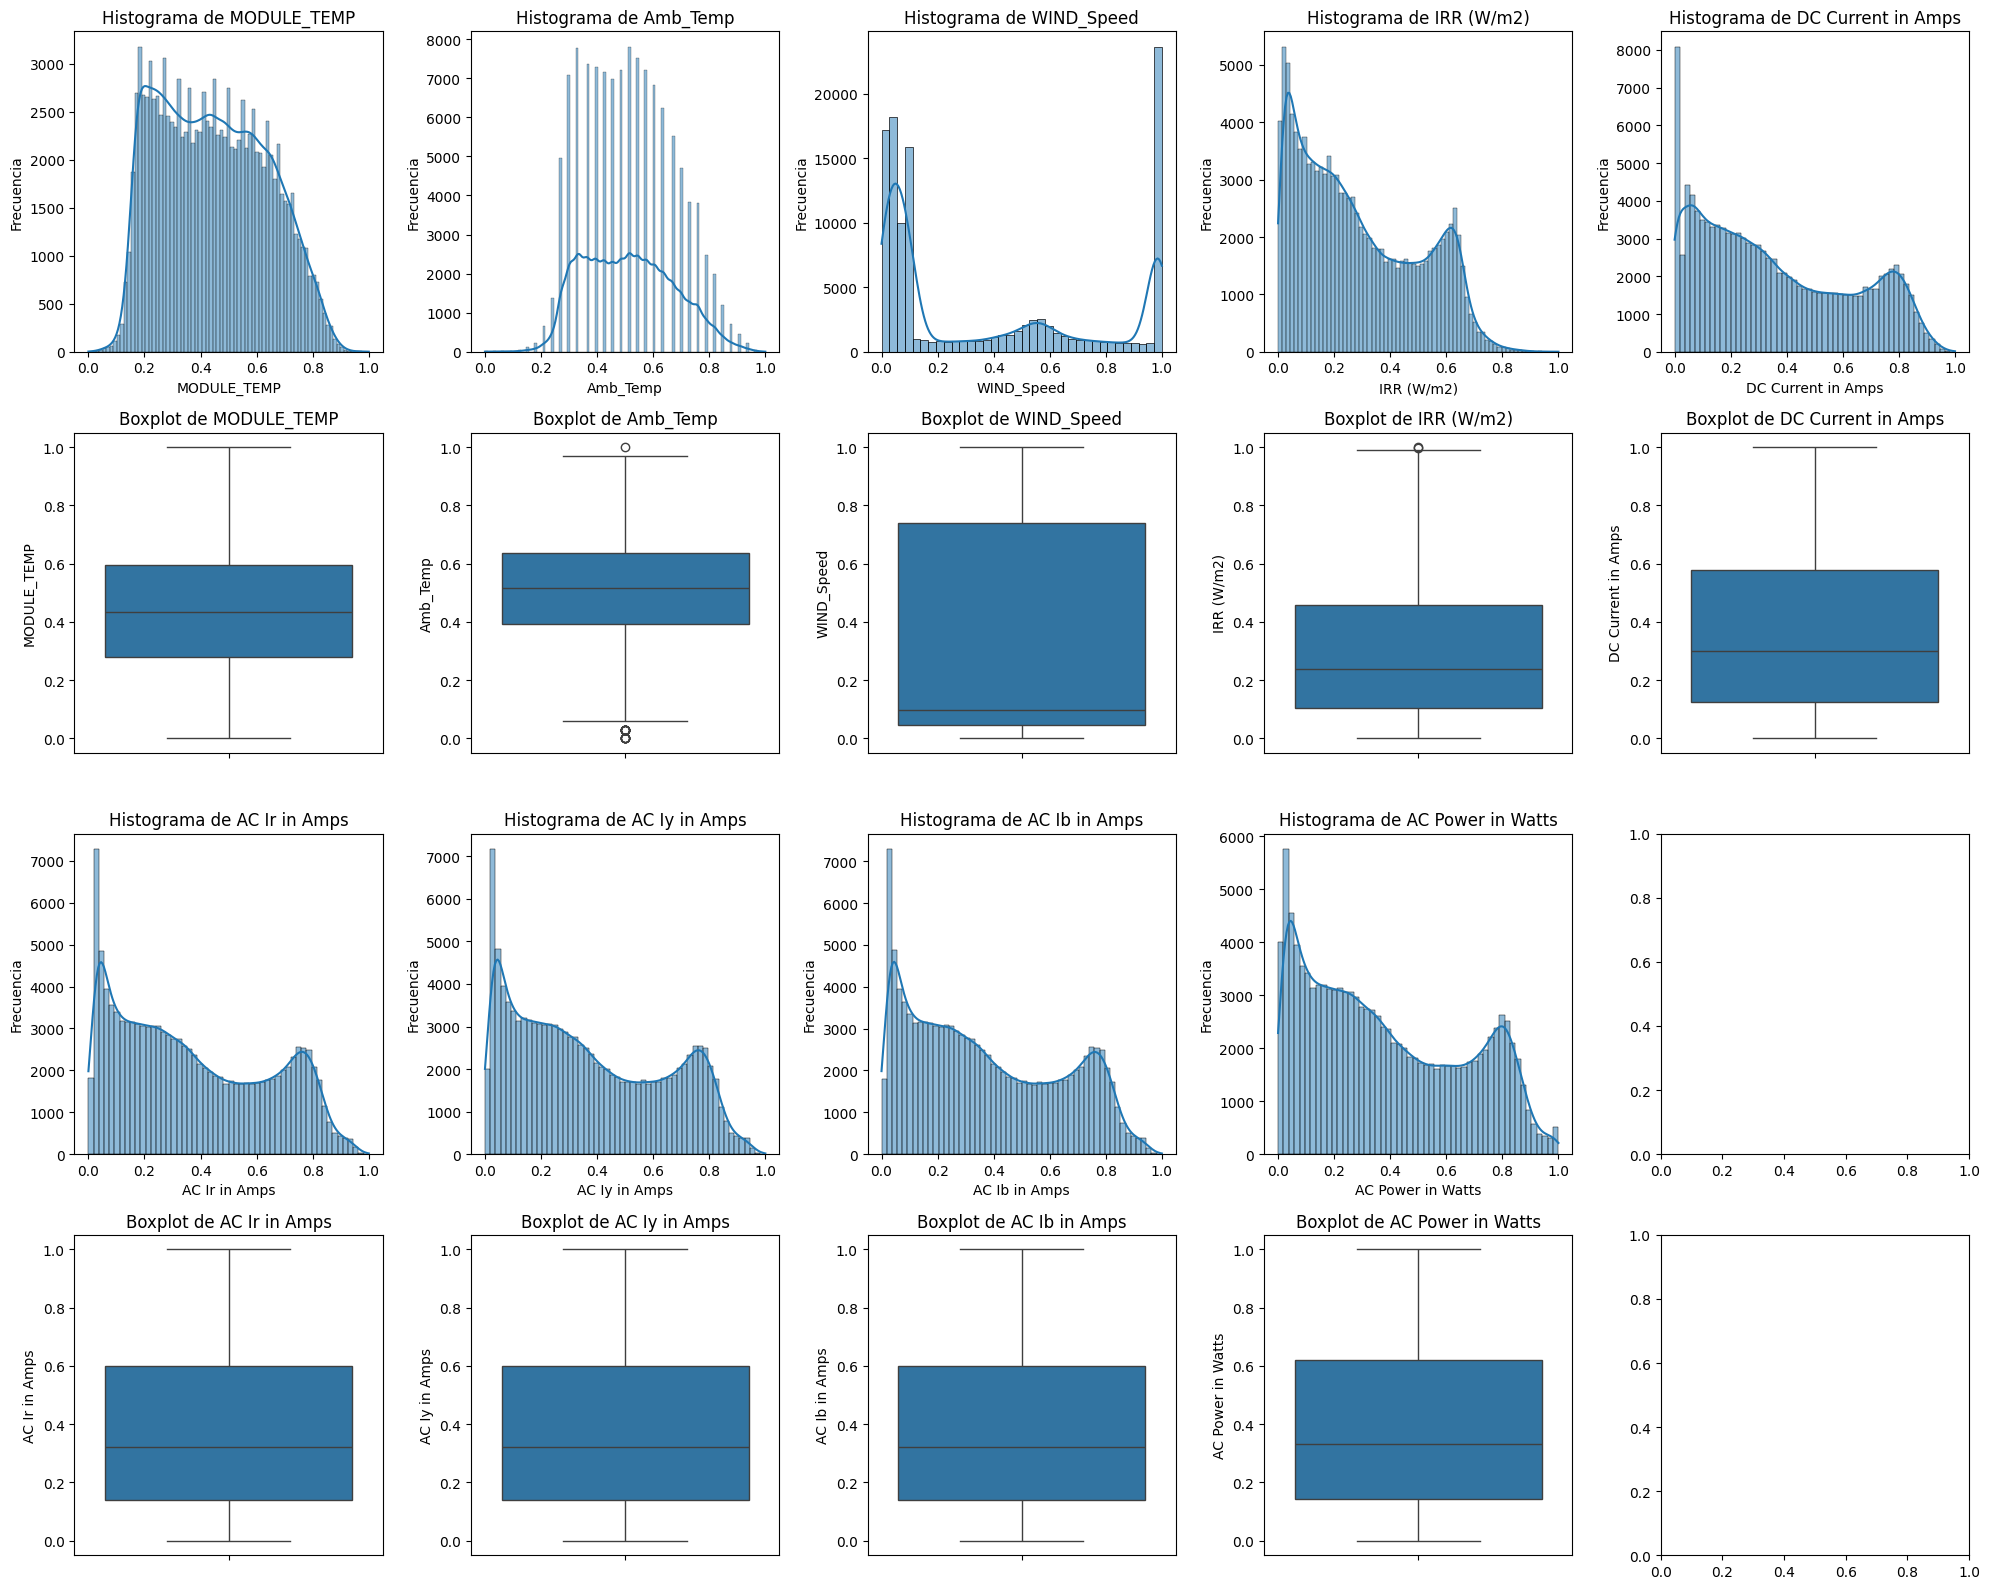

In [31]:
# Aplicar la función a ambos DataFrames
analizar_univariable_tabla(df_minmax, "df_minmax")

## Análisis Univariable para df_robust


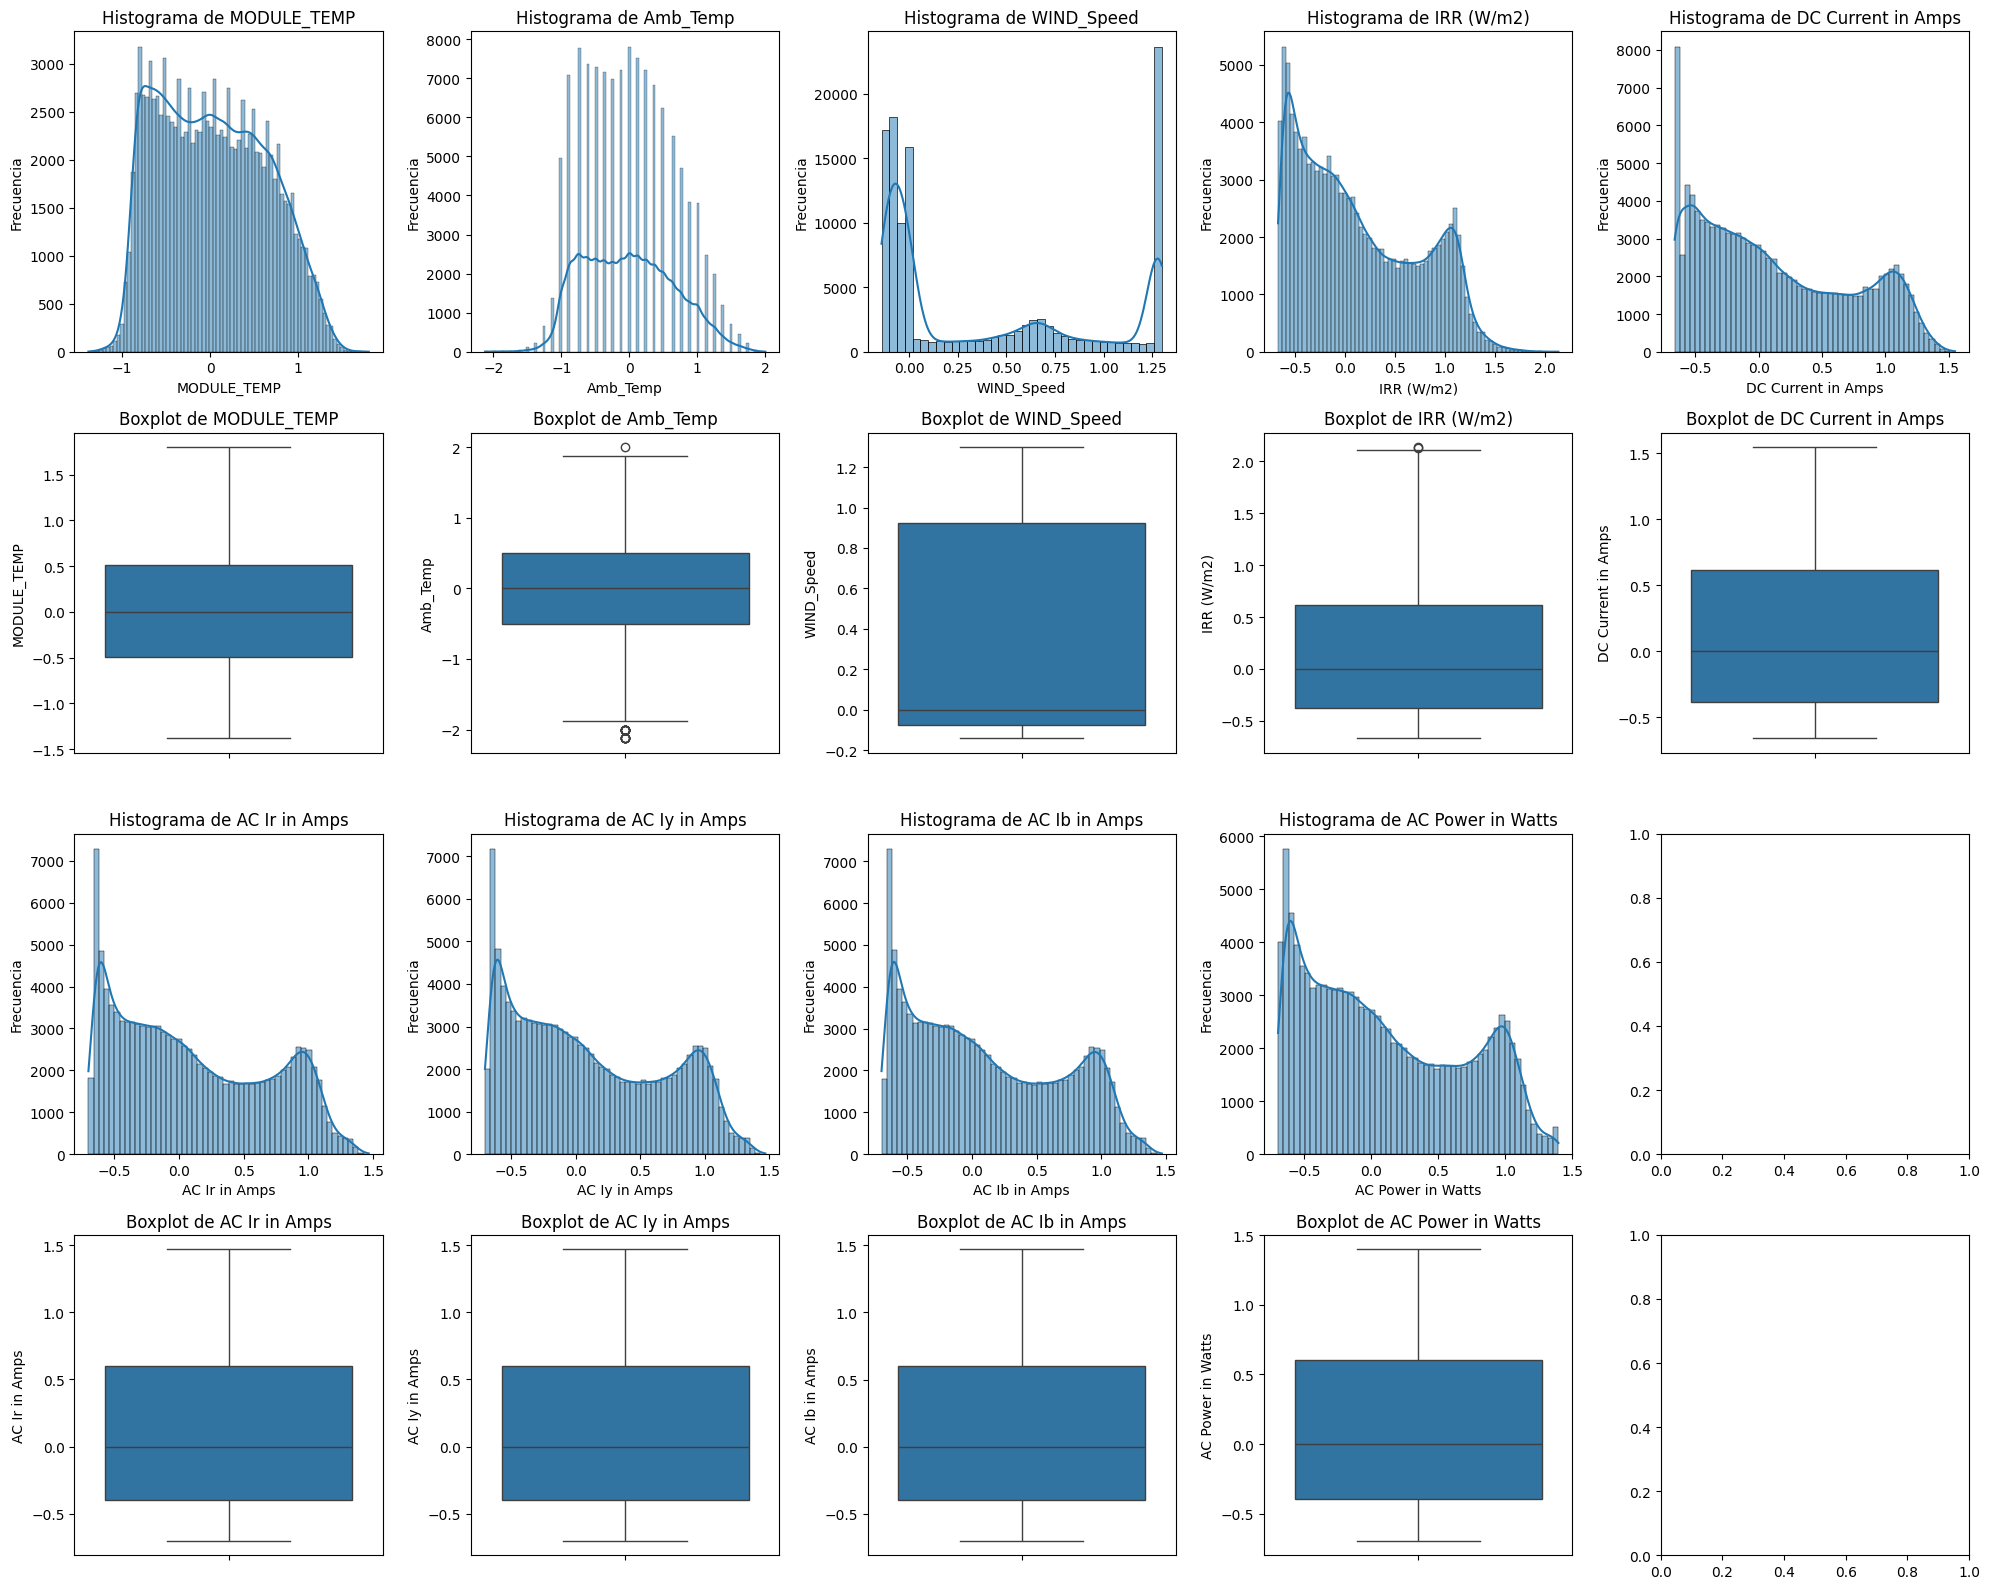

In [32]:
analizar_univariable_tabla(df_robust, "df_robust")

## Análisis Bivariado
* Calcular y visualizar la correlación entre variables para explorar la relación entre dos variables

In [33]:
# prompt: modifica la funcion analizar_bivariado, para que analice cada una de las variables del dataset contra la variable objetivo 'AC Power in Watts' para mirar como se relacionan y cual es mas significativa

# Análisis Bivariado
def analizar_bivariado(df, nombre_df):
    """
    Realiza análisis bivariado en un DataFrame dado, comparando cada variable con 'AC Power in Watts'.

    Args:
        df: DataFrame a analizar.
        nombre_df: Nombre del DataFrame (para mostrar en los títulos).
    """
    print(f"## Análisis Bivariado para {nombre_df} contra 'AC Power in Watts'")

    target_variable = 'AC Power in Watts'
    numerical_cols = df.select_dtypes(include=["number"]).columns

    # Eliminar la variable objetivo de la lista de variables a comparar
    if target_variable in numerical_cols:
        numerical_cols = numerical_cols.drop(target_variable)

    num_cols = len(numerical_cols)

    # Crear la figura con el número correcto de filas y columnas
    fig, ejes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 4 * num_cols))

    for i, col in enumerate(numerical_cols):
        # Diagrama de dispersión
        sns.scatterplot(x=col, y=target_variable, data=df, ax=ejes[i, 0])
        ejes[i, 0].set_title(f"{col} vs {target_variable}")

        # Calcular la correlación
        correlation = df[col].corr(df[target_variable])
        ejes[i, 1].text(0.5, 0.5, f"Correlación: {correlation:.2f}", ha='center', va='center', fontsize=12)
        ejes[i, 1].axis('off')  # Desactivar los ejes en el subplot de la correlación


    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()

## Análisis Bivariado para df_minmax contra 'AC Power in Watts'


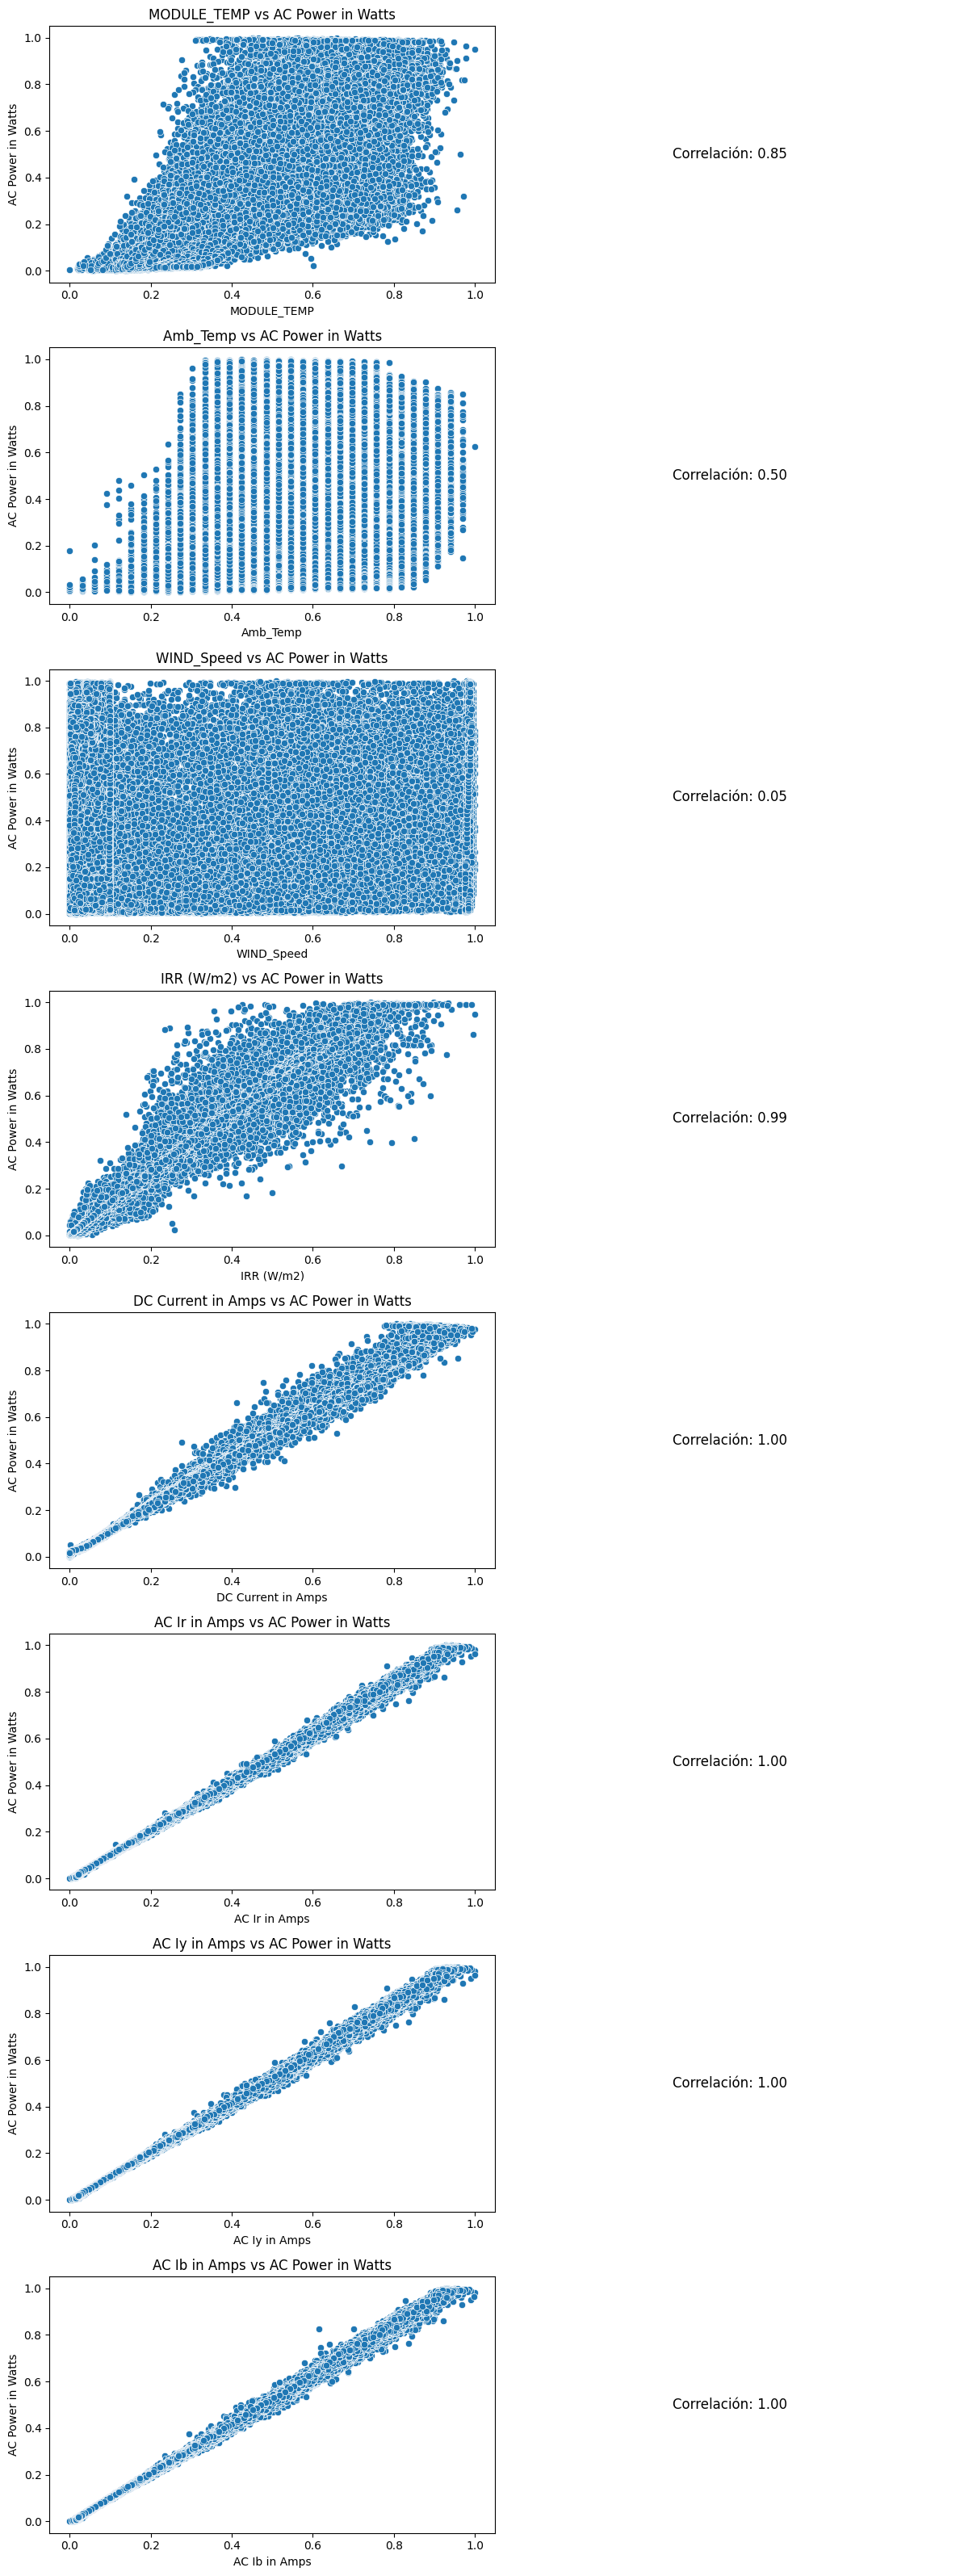

In [34]:
# Aplicar la función a ambos DataFrames
analizar_bivariado(df_minmax, "df_minmax")


## Análisis Bivariado para df_robust contra 'AC Power in Watts'


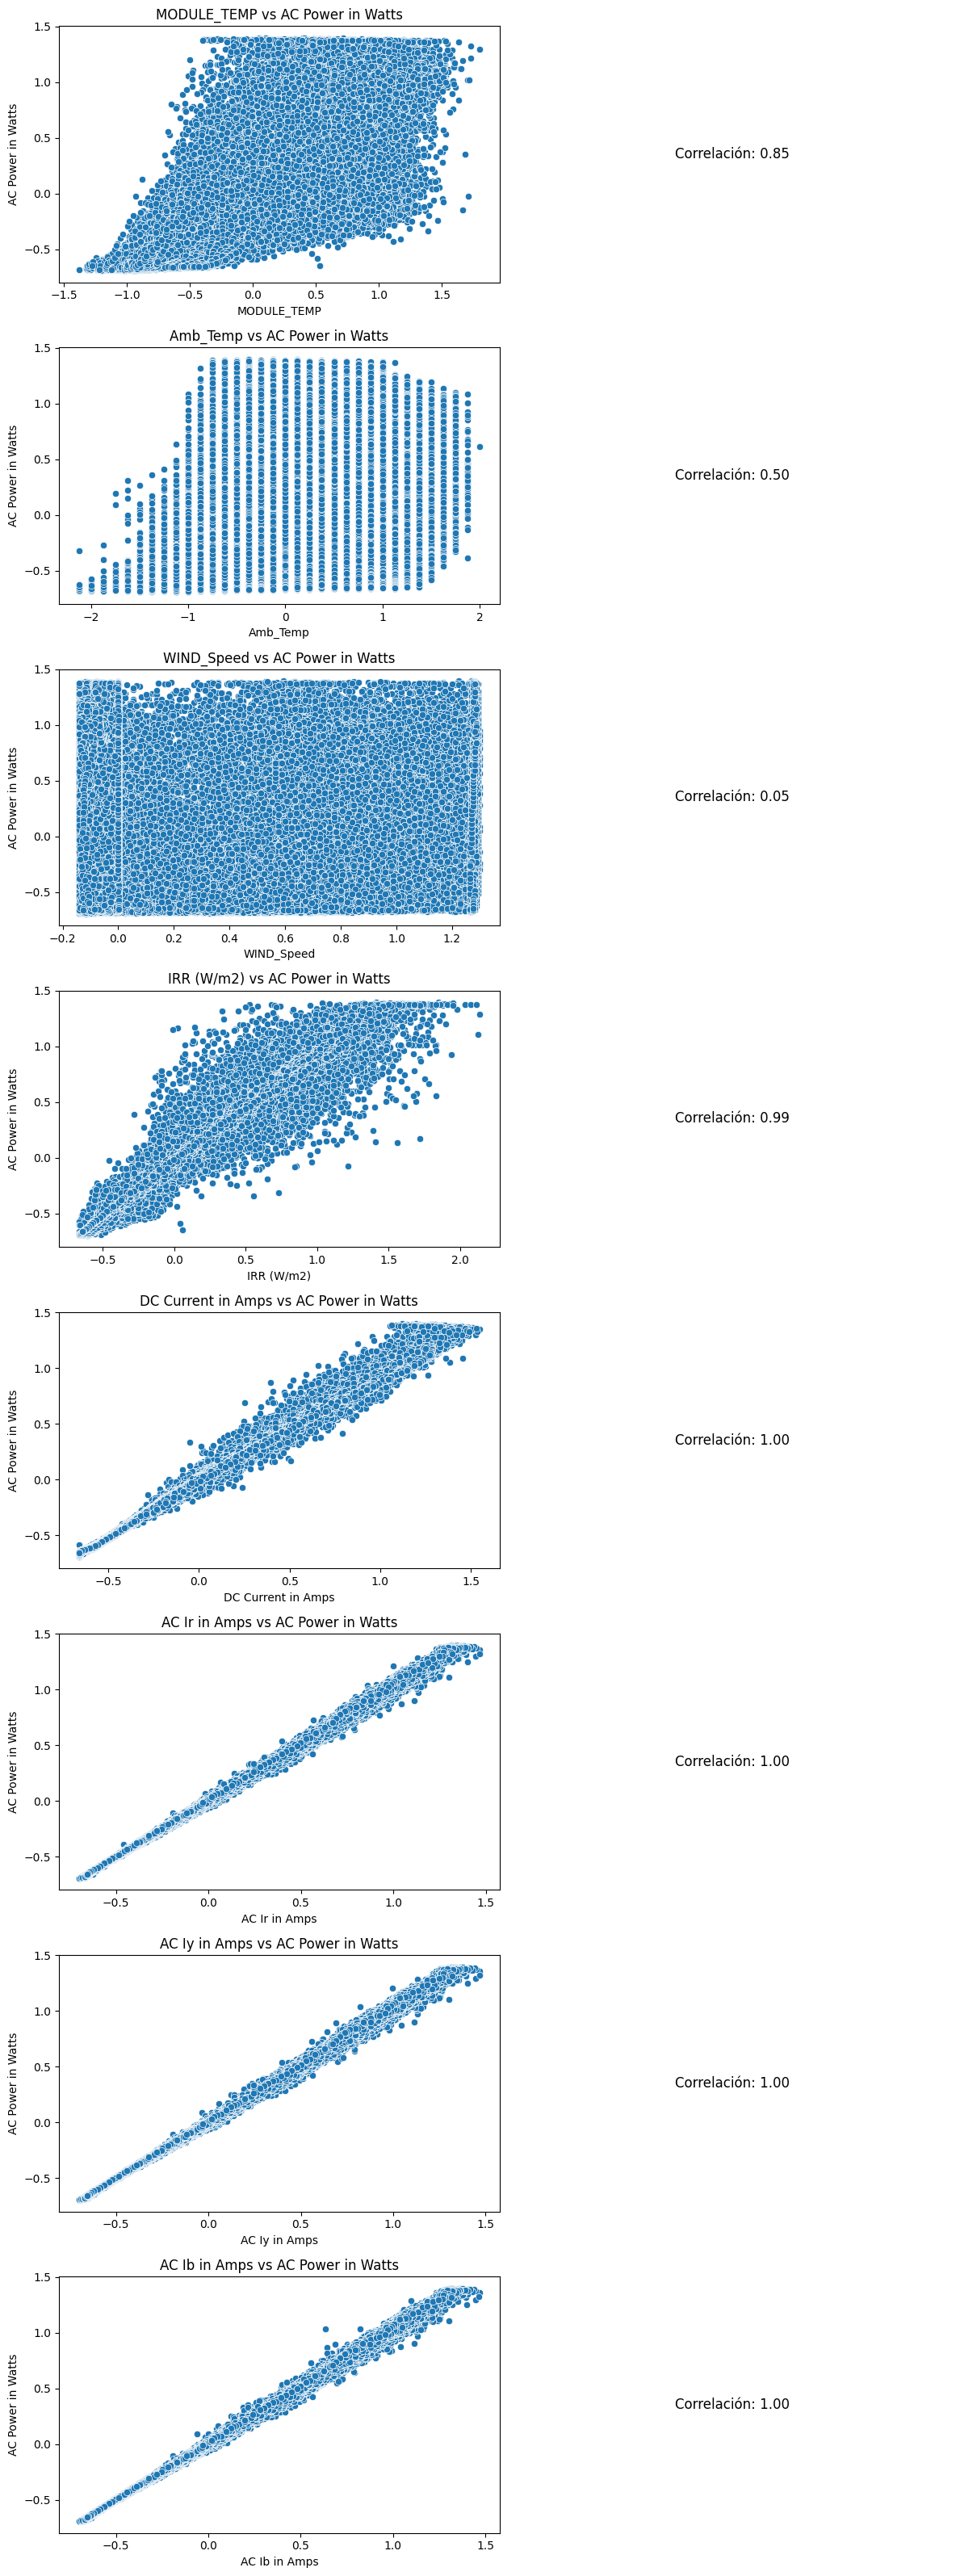

In [35]:
analizar_bivariado(df_robust, "df_robust")

En las graficas anteriores, nos damos cuenta que la relacion mas fuerte de las caracteristicas hacia nuestra variable objetivo 'AC Power in Watts' es la caracteristica 'IRR' que es el nivel de radiacion, mientras que la velocidad del viento 'WIND_Speed' no influye en la generacion de Watts de energia. Igualmente todas las variables que comienzan por AC, son identicas o redundantes para la variables objetivo 'AC Power in Watts'.

Como vimos que las columnas de Viento y las de AC y DC con redundantes, solo dejamos, las columnas de temperatura, radiacion y Potencia en Watts

In [36]:
df_minmax.head()

MODULE_TEMP  Amb_Temp  WIND_Speed  IRR (W/m2)  DC Current in Amps  \
0     0.155875  0.303030    0.079314    0.002853            0.000000   
1     0.153477  0.333333    0.107214    0.007133            0.000060   
2     0.158273  0.333333    0.143085    0.009986            0.004160   
3     0.158273  0.333333    0.139099    0.015692            0.007617   
4     0.160671  0.333333    0.095257    0.022825            0.026189   

   AC Ir in Amps  AC Iy in Amps  AC Ib in Amps  AC Power in Watts  
0       0.015659       0.015662       0.015645           0.008546  
1       0.017834       0.018055       0.018470           0.012371  
2       0.022836       0.023059       0.023685           0.018723  
3       0.029143       0.028932       0.028683           0.025817  
4       0.037408       0.036981       0.036940           0.035148

In [37]:
# Mantener solo las columnas relevantes
df_minmax = df_minmax[['MODULE_TEMP', 'Amb_Temp', 'IRR (W/m2)', 'AC Power in Watts']]
df_robust = df_robust[['MODULE_TEMP', 'Amb_Temp', 'IRR (W/m2)', 'AC Power in Watts']]

print("\nDataFrame con Escalamiento Min-Max (columnas relevantes):")
print(df_minmax.head())
print("\nDataFrame con Escalamiento Robusto (columnas relevantes):")
print(df_robust.head())


DataFrame con Escalamiento Min-Max (columnas relevantes):
   MODULE_TEMP  Amb_Temp  IRR (W/m2)  AC Power in Watts
0     0.155875  0.303030    0.002853           0.008546
1     0.153477  0.333333    0.007133           0.012371
2     0.158273  0.333333    0.009986           0.018723
3     0.158273  0.333333    0.015692           0.025817
4     0.160671  0.333333    0.022825           0.035148

DataFrame con Escalamiento Robusto (columnas relevantes):
   MODULE_TEMP  Amb_Temp  IRR (W/m2)  AC Power in Watts
0    -0.885496    -0.875      -0.660          -0.676332
1    -0.893130    -0.750      -0.648          -0.668331
2    -0.877863    -0.750      -0.640          -0.655048
3    -0.877863    -0.750      -0.624          -0.640211
4    -0.870229    -0.750      -0.604          -0.620697


## Análisis Multivariado:
* Realizar un Análisis de Componentes Principales (PCA) para reducir la dimensionalidad.


In [38]:
def apply_pca(df, scaler_name):
    df_copy = df.copy()
    # Remover 'AC Power in Watts' antes de aplicar PCA
    X = df_copy.drop('AC Power in Watts', axis=1)

    # Applicar PCA
    pca = PCA(n_components=1) # Reduce a 1 componente principal
    pca_result = pca.fit_transform(X)

    # Create nuevo DataFrame con el resultado de PCA y 'AC Power in Watts'
    pca_df = pd.DataFrame(data={'PCA_1': pca_result.flatten(),
                                'AC Power in Watts': df['AC Power in Watts']})

    print(f"\nDataFrame despues de PCA ({scaler_name}):")
    print(pca_df.head())
    return pca_df

In [39]:
# Apply PCA to both dataframes
pca_df_minmax = apply_pca(df_minmax, 'MinMaxScaler')
pca_df_robust = apply_pca(df_robust, 'RobustScaler')


DataFrame despues de PCA (MinMaxScaler):
      PCA_1  AC Power in Watts
0 -0.453627           0.008546
1 -0.439855           0.012371
2 -0.434962           0.018723
3 -0.431175           0.025817
4 -0.424941           0.035148

DataFrame despues de PCA (RobustScaler):
      PCA_1  AC Power in Watts
0 -1.486707          -0.676332
1 -1.411172          -0.668331
2 -1.397639          -0.655048
3 -1.389171          -0.640211
4 -1.373937          -0.620697


* Crear visualizaciones complejas para entender mejor la interacción entre múltiples variables

In [40]:
def analizar_multivariado(df, nombre_df):
  """
  Realiza un análisis multivariado de un DataFrame dado, incluyendo todas las variables.

  Args:
    df: DataFrame a analizar.
    nombre_df: Nombre del DataFrame para mostrar en los títulos.
  """

  print(f"## Análisis Multivariado para {nombre_df}")

  # Matriz de correlación
  print("\n")
  correlation_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f"Matriz de Correlación para {nombre_df}")
  plt.show()

  # Gráfico de dispersión para pares de variables
  print("\n\n")
  sns.pairplot(df)
  plt.suptitle(f"Gráficos de Dispersión para {nombre_df}", y=1.02)
  plt.show()

## Análisis Multivariado para df_minmax




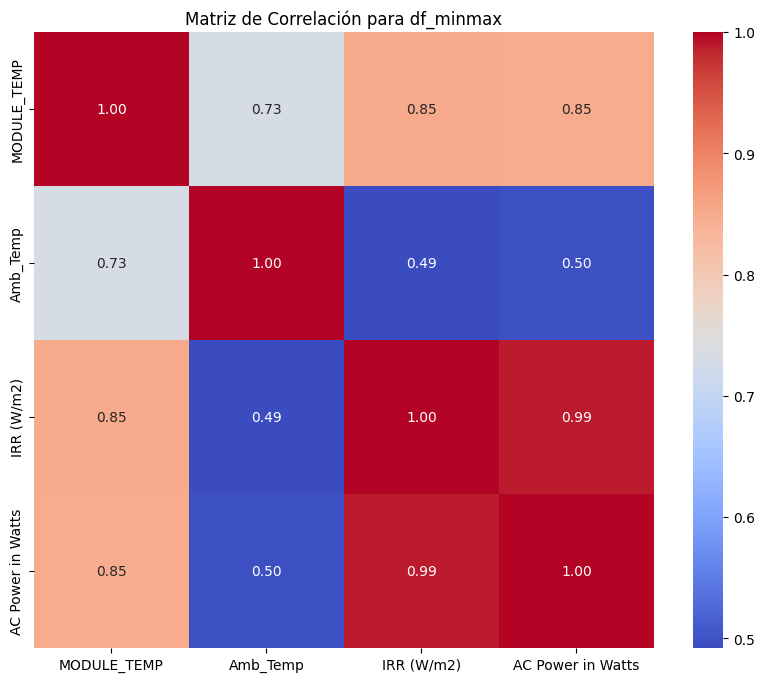

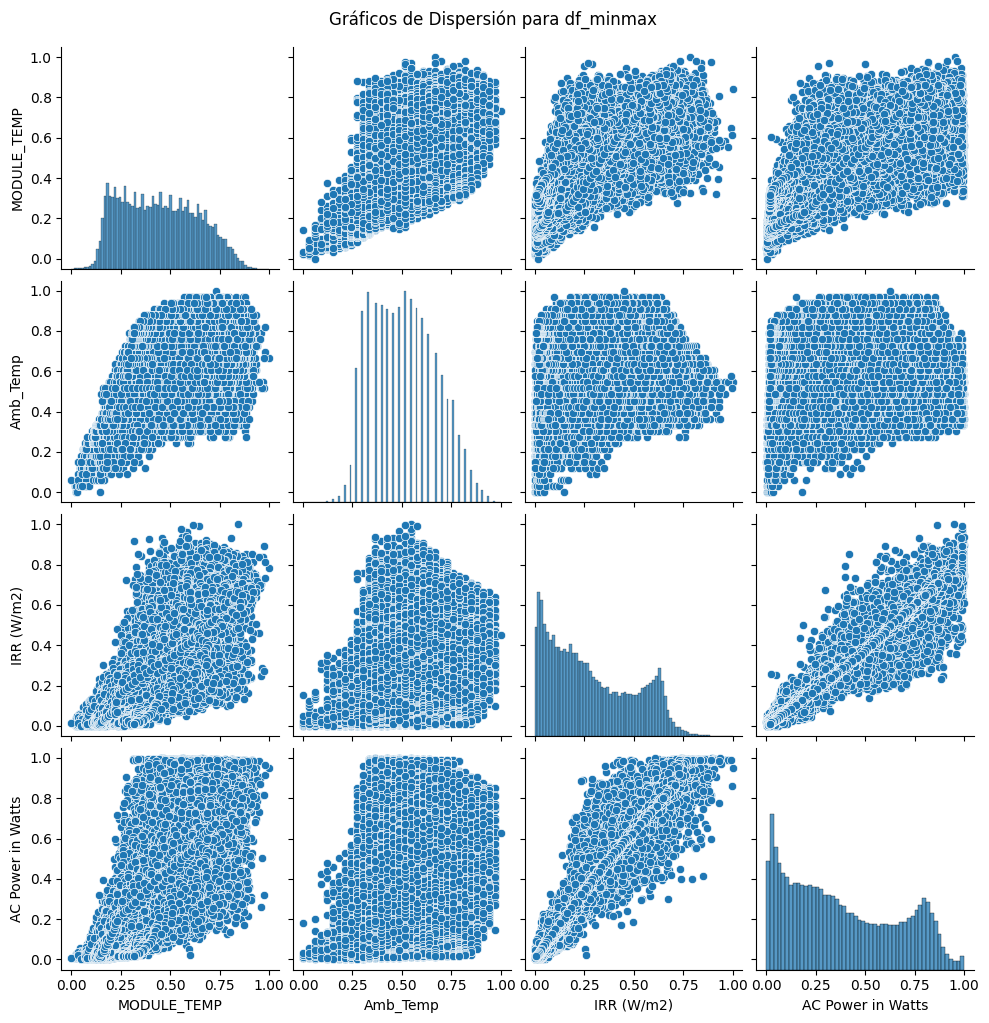

In [41]:
# Aplica la función de análisis multivariado a ambos dataframes
analizar_multivariado(df_minmax, "df_minmax")

## Análisis Multivariado para df_robust




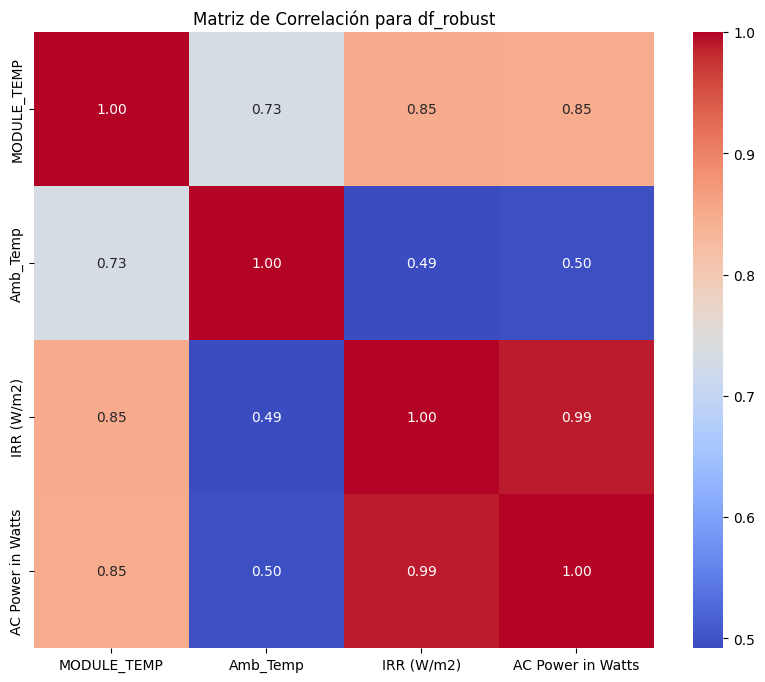

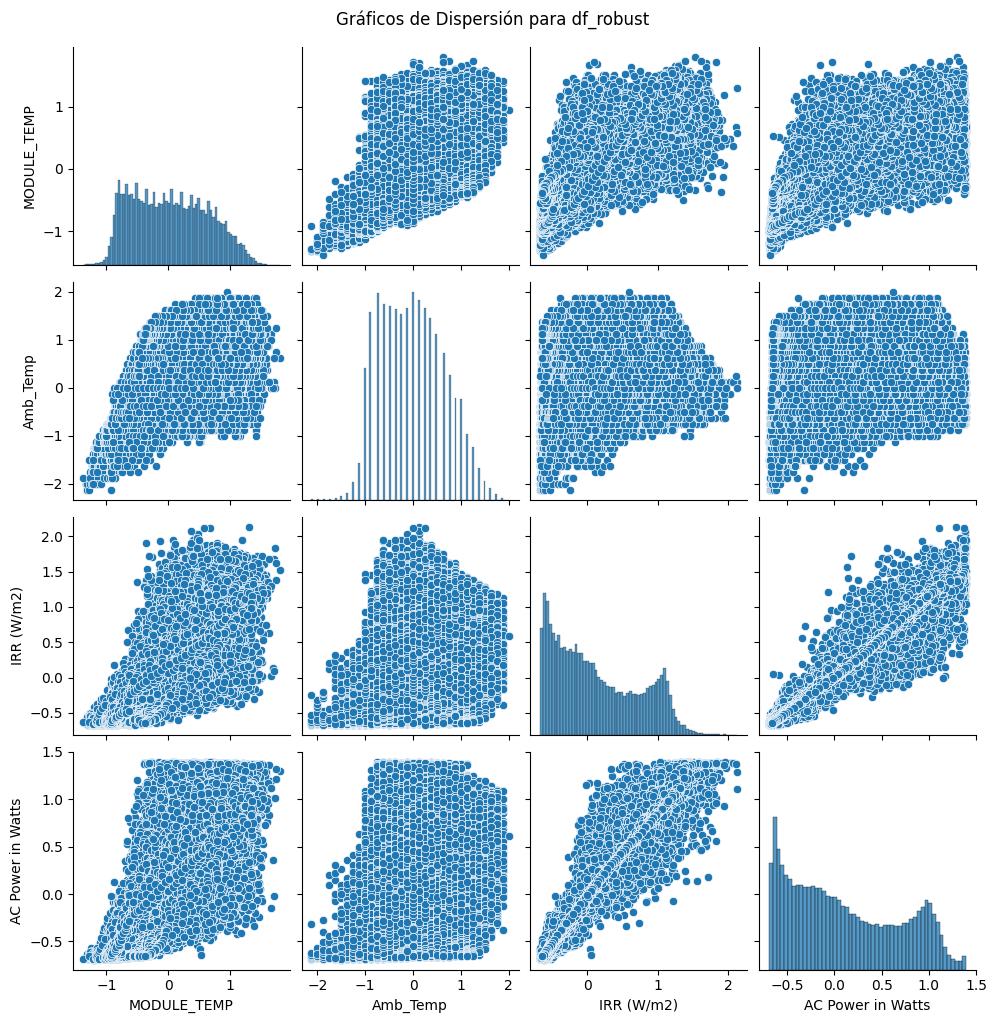

In [42]:
analizar_multivariado(df_robust, "df_robust")

## Reflexión y conclusión
* Reflexionar sobre el proceso seguido y los desafíos encontrados.

### Análisis del Conjunto de Datos de Generación de Energía Solar

#### Resumen del Notebook

Este notebook realiza un análisis exploratorio de datos (EDA) sobre un conjunto de datos de generación de energía solar.  Se cubren etapas clave, desde la carga y exploración inicial hasta la normalización, análisis univariado, bivariado y multivariado, con el objetivo de comprender las relaciones entre las diferentes variables y preparar los datos para un posible modelo de aprendizaje automático.


#### Carga y Exploración Inicial

El dataset se carga exitosamente utilizando pandas. Se verifica el tamaño del dataset (número de filas y columnas) y se identifican los tipos de datos de cada columna.  Afortunadamente, no se encontraron valores faltantes, simplificando significativamente el preprocesamiento.


#### Limpieza de Datos

Se realiza una verificación de datos basura, incluyendo valores duplicados y valores fuera de rangos esperados. No se encontraron datos duplicados ni valores anómalos en la temperatura ambiente o en la velocidad del viento. Esto indica una buena calidad de los datos de entrada. Se realiza una verificación de datos negativos en las columnas numéricas para descartar errores de medición.


#### Normalización

Se aplican dos técnicas de normalización: Min-Max Scaling y RobustScaler.  Min-Max Scaling escala los datos a un rango específico (0 a 1) mientras que RobustScaler es menos sensible a valores atípicos. Se crea una copia del dataframe original para cada tipo de escalamiento. Se observa que las diferentes técnicas de escalado producen distintas distribuciones de datos.


#### Análisis Univariado

Se realiza un análisis univariado para cada variable numérica en ambos dataframes normalizados. Se utiliza el test de Shapiro-Wilk para validar la normalidad de la distribución de los datos.  Se calcula además estadísticas descriptivas: media, mediana, moda y desviación estándar.  Se muestran histogramas y boxplots para visualizar la distribución de cada variable. Se observa la diferencia entre ambas transformaciones de los datos.


#### Análisis Bivariado

Se realiza un análisis bivariado para explorar la relación entre cada variable numérica y la variable objetivo "AC Power in Watts". Se calculan las correlaciones y se generan diagramas de dispersión para visualizar la relación entre cada par de variables.  En las gráficas se observa una alta correlación entre "IRR (W/m2)" y "AC Power in Watts", lo que indica que la irradiancia es un predictor importante para la potencia de salida. Se observa que la velocidad del viento no influye significativamente en la producción de energía. También se observa redundancia en las columnas AC, por lo que se eliminan en una nueva versión del dataframe.


#### Análisis Multivariado

Se realiza un Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del dataset. Se reduce a 1 componente principal y se crea una visualización usando una matriz de correlación y un diagrama de dispersión de pares.

#### Reducción de Columnas

Se seleccionan las columnas más relevantes: 'MODULE_TEMP', 'Amb_Temp', 'IRR (W/m2)', y 'AC Power in Watts', eliminando las columnas redundantes identificadas previamente, lo que facilita la manipulación del dataframe para futuros análisis.

#### Reflexiones y Conclusiones

El análisis exploratorio de datos revela que la irradiancia ("IRR (W/m2)") es la variable más relevante para predecir la potencia de salida del sistema fotovoltaico. La velocidad del viento no parece tener una influencia significativa, al igual que las variables de corriente alterna AC.  La limpieza de datos, al no haber datos faltantes o anómalos, fue un paso más sencillo. La normalización de los datos mediante diferentes métodos resulta en diferentes distribuciones que potencialmente podrían afectar el desempeño de un modelo de Machine Learning, por lo que será importante elegir el método adecuado. El uso de PCA ayuda a reducir la dimensionalidad para los modelos más complejos. El EDA proporciona una base sólida para el desarrollo futuro de modelos predictivos.  


####  Posibles Mejoras y Siguientes Pasos

* **Profundizar en el análisis de la variable objetivo:** Un análisis más detallado de "AC Power in Watts" puede revelar patrones temporales o estacionales que se puedan explotar para mejorar las predicciones.
* **Incorporar variables temporales:** Si el dataset incluye información temporal (fecha y hora), se pueden explorar las tendencias y patrones temporales de la generación de energía solar.
* **Modelar:** Entrenar y evaluar modelos de machine learning para predecir la generación de energía solar.